- Image transformation: DeepInsight
- CNN Model: Self implmented, basic sequential, 2 relu layers and 1 flatten layer 
- Average accuracy out of 5 trials: 0.937


In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
pip -q install git+git://github.com/alok-ai-lab/DeepInsight.git#egg=DeepInsight

In [ ]:
import pandas as pd
import csv 
import numpy as np 
from sklearn.model_selection import train_test_split
from pyDeepInsight import ImageTransformer, LogScaler

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/USYD/2021 S1/INFO4001/deng-reads-RawCount-modefied.csv',header=None)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252

In [ ]:
def shuffle_data(x):
    
    # save header
    tmp_head = x[0]

    #remove header 
    x = x[1:]

    # shuffle by row 
    np.random.shuffle(x)

    #stack header
    x = np.vstack((tmp_head,x))

    # shuffle by column after T transformation 
    x = x.T 

    tmp_head = x[0]
    x = x[1:]

    np.random.shuffle(x)

    x = np.vstack((tmp_head,x))

    return x 

(214, 21297) (54, 21297) (214,) (54,)


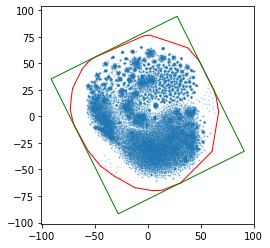

CPU times: user 8min 19s, sys: 2.58 s, total: 8min 21s
Wall time: 4min 19s


In [ ]:
%%time

mt = df.to_numpy()


#shuffle dataset by rows and cols
mt = shuffle_data(mt)


# get type for each sample 
mt_Y = mt.T[0][1:]

mt1 = mt[:,1:]
mt_X = mt1[1:]
mt_X = mt_X.astype('float64')

# split data to train and test 
x_train, x_test, y_train, y_test = train_test_split(
    mt_X, mt_Y, test_size=0.2)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# normalise x_train and x_test 
ln = LogScaler()
x_train_norm = ln.fit_transform(x_train)
x_test_norm = ln.transform(x_test)

# Initiate DeepInsight image transformer 
it = ImageTransformer(feature_extractor='tsne', 
                      pixels=50, random_state=12345, 
                      n_jobs=-1)





_ = it.fit(x_train_norm, plot=True)

x_train_img = it.transform(x_train_norm)
x_test_img = it.transform(x_test_norm)

In [ ]:
import tensorflow as tf
#from tensorflow.keras.datasets import cifar10
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import numpy as np

In [ ]:
label = ['16cell','2cell','4cell','8cell','blast','zygote']

n_lst=[]
for i in range(len(y_train)):
  for j in range(len(label)):
    if y_train[i] == label[j]:

      n_lst.append(j)

y_new_train = np.array(n_lst,dtype='float64')

n_lst=[]
for i in range(len(y_test)):
  for j in range(len(label)):
    if y_test[i] == label[j]:
      n_lst.append(j)

y_new_test = np.array(n_lst,dtype='float64')

In [ ]:
df_y_train = to_categorical(y_new_train,num_classes=6)

In [ ]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=(50,50,3)) )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3) ))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(6))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

len(x_train_img)

model.fit(x_train_img,df_y_train, batch_size=32, epochs=90, validation_split=0.1)

Epoch 1/90
6/6 [==============================] - 1s 174ms/step - loss: 1.5831 - accuracy: 0.3827 - val_loss: 1.3989 - val_accuracy: 0.4091
Epoch 2/90
6/6 [==============================] - 1s 147ms/step - loss: 1.1610 - accuracy: 0.5268 - val_loss: 1.0561 - val_accuracy: 0.4091
Epoch 3/90
6/6 [==============================] - 1s 142ms/step - loss: 0.7811 - accuracy: 0.7100 - val_loss: 0.6495 - val_accuracy: 0.9545
Epoch 4/90
6/6 [==============================] - 1s 142ms/step - loss: 0.3964 - accuracy: 0.8981 - val_loss: 0.6895 - val_accuracy: 0.7727
Epoch 5/90
6/6 [==============================] - 1s 143ms/step - loss: 0.2746 - accuracy: 0.8548 - val_loss: 0.8301 - val_accuracy: 0.9545
Epoch 6/90
6/6 [==============================] - 1s 145ms/step - loss: 0.2099 - accuracy: 0.9249 - val_loss: 0.8493 - val_accuracy: 0.9545
Epoch 7/90
6/6 [==============================] - 1s 144ms/step - loss: 0.1586 - accuracy: 0.9371 - val_loss: 0.8429 - val_accuracy: 0.7727
Epoch 8/90
6/6 [====

In [ ]:
df_y_test = to_categorical(y_new_test,num_classes=6)

val_loss, val_acc = model.evaluate(x_test_img,df_y_test)
print(val_loss, val_acc)

2/2 [==============================] - 0s 28ms/step - loss: 0.0350 - accuracy: 0.9630
0.0350414477288723 0.9629629850387573


In [ ]:


## Run 5 times 


def model_repeat(df):

    mt = df.to_numpy()


    #shuffle dataset by rows and cols
    mt = shuffle_data(mt)


    # get type for each sample 
    mt_Y = mt.T[0][1:]

    mt1 = mt[:,1:]
    mt_X = mt1[1:]
    mt_X = mt_X.astype('float64')

    # split data to train and test 
    x_train, x_test, y_train, y_test = train_test_split(
        mt_X, mt_Y, test_size=0.2)

    print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

    # normalise x_train and x_test 
    ln = LogScaler()
    x_train_norm = ln.fit_transform(x_train)
    x_test_norm = ln.transform(x_test)

    # Initiate DeepInsight image transformer 
    it = ImageTransformer(feature_extractor='tsne', 
                        pixels=50, random_state=12345, 
                        n_jobs=-1)





    _ = it.fit(x_train_norm, plot=True)

    x_train_img = it.transform(x_train_norm)
    x_test_img = it.transform(x_test_norm)


    label = ['16cell','2cell','4cell','8cell','blast','zygote']

    n_lst=[]
    for i in range(len(y_train)):
        for j in range(len(label)):
            if y_train[i] == label[j]:

                n_lst.append(j)

    y_new_train = np.array(n_lst,dtype='float64')

    n_lst=[]
    for i in range(len(y_test)):
        for j in range(len(label)):
            if y_test[i] == label[j]:
                n_lst.append(j)

    y_new_test = np.array(n_lst,dtype='float64')


    df_y_train = to_categorical(y_new_train,num_classes=6)


    model = Sequential()
    model.add(Conv2D(64,(3,3),input_shape=(50,50,3)) )
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,(3,3) ))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(64))

    model.add(Dense(6))
    model.add(Activation('sigmoid'))

    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    len(x_train_img)

    model.fit(x_train_img,df_y_train, batch_size=32, epochs=90, validation_split=0.1)


    df_y_test = to_categorical(y_new_test,num_classes=6)

    val_loss, val_acc = model.evaluate(x_test_img,df_y_test)
    print(val_loss, val_acc)
   
    return val_acc, val_loss

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252

(214, 21297) (54, 21297) (214,) (54,)


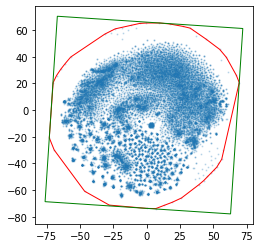

Epoch 1/90
6/6 [==============================] - 2s 183ms/step - loss: 1.6477 - accuracy: 0.3199 - val_loss: 1.4636 - val_accuracy: 0.3636
Epoch 2/90
6/6 [==============================] - 1s 150ms/step - loss: 1.3084 - accuracy: 0.4961 - val_loss: 1.2396 - val_accuracy: 0.3636
Epoch 3/90
6/6 [==============================] - 1s 147ms/step - loss: 0.9203 - accuracy: 0.6109 - val_loss: 0.8667 - val_accuracy: 0.7727
Epoch 4/90
6/6 [==============================] - 1s 146ms/step - loss: 0.5996 - accuracy: 0.8419 - val_loss: 0.6865 - val_accuracy: 0.6818
Epoch 5/90
6/6 [==============================] - 1s 153ms/step - loss: 0.3210 - accuracy: 0.8763 - val_loss: 0.6876 - val_accuracy: 0.6818
Epoch 6/90
6/6 [==============================] - 1s 153ms/step - loss: 0.1846 - accuracy: 0.9188 - val_loss: 0.8518 - val_accuracy: 0.6818
Epoch 7/90
6/6 [==============================] - 1s 148ms/step - loss: 0.2098 - accuracy: 0.8859 - val_loss: 0.5857 - val_accuracy: 0.7727
Epoch 8/90
6/6 [====

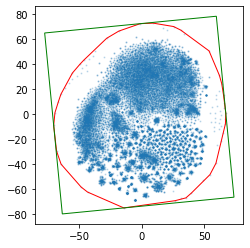

Epoch 1/90
6/6 [==============================] - 2s 186ms/step - loss: 1.6216 - accuracy: 0.3431 - val_loss: 1.6168 - val_accuracy: 0.4545
Epoch 2/90
6/6 [==============================] - 1s 149ms/step - loss: 1.4277 - accuracy: 0.5203 - val_loss: 1.6297 - val_accuracy: 0.4545
Epoch 3/90
6/6 [==============================] - 1s 150ms/step - loss: 1.1098 - accuracy: 0.5129 - val_loss: 1.4599 - val_accuracy: 0.5909
Epoch 4/90
6/6 [==============================] - 1s 146ms/step - loss: 0.7909 - accuracy: 0.8100 - val_loss: 0.6771 - val_accuracy: 0.6818
Epoch 5/90
6/6 [==============================] - 1s 149ms/step - loss: 0.4162 - accuracy: 0.8738 - val_loss: 0.4877 - val_accuracy: 0.7727
Epoch 6/90
6/6 [==============================] - 1s 148ms/step - loss: 0.2739 - accuracy: 0.9255 - val_loss: 0.2757 - val_accuracy: 0.9091
Epoch 7/90
6/6 [==============================] - 1s 156ms/step - loss: 0.1962 - accuracy: 0.9221 - val_loss: 0.3392 - val_accuracy: 0.7727
Epoch 8/90
6/6 [====

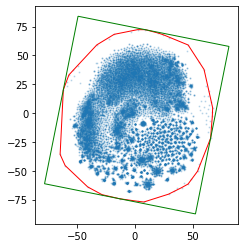

Epoch 1/90
6/6 [==============================] - 2s 194ms/step - loss: 1.5789 - accuracy: 0.4564 - val_loss: 0.9564 - val_accuracy: 0.6818
Epoch 2/90
6/6 [==============================] - 1s 158ms/step - loss: 1.1121 - accuracy: 0.5908 - val_loss: 0.6002 - val_accuracy: 0.7727
Epoch 3/90
6/6 [==============================] - 1s 158ms/step - loss: 0.5686 - accuracy: 0.8433 - val_loss: 0.3813 - val_accuracy: 0.9091
Epoch 4/90
6/6 [==============================] - 1s 156ms/step - loss: 0.3994 - accuracy: 0.7958 - val_loss: 0.4553 - val_accuracy: 0.9091
Epoch 5/90
6/6 [==============================] - 1s 159ms/step - loss: 0.3874 - accuracy: 0.8834 - val_loss: 0.6754 - val_accuracy: 0.8182
Epoch 6/90
6/6 [==============================] - 1s 156ms/step - loss: 0.3489 - accuracy: 0.8356 - val_loss: 0.2346 - val_accuracy: 0.9091
Epoch 7/90
6/6 [==============================] - 1s 157ms/step - loss: 0.1353 - accuracy: 0.9773 - val_loss: 0.3222 - val_accuracy: 0.8182
Epoch 8/90
6/6 [====

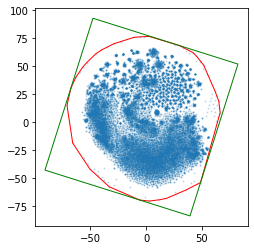

Epoch 1/90
6/6 [==============================] - 2s 189ms/step - loss: 1.6152 - accuracy: 0.2962 - val_loss: 1.3600 - val_accuracy: 0.5000
Epoch 2/90
6/6 [==============================] - 1s 158ms/step - loss: 1.1900 - accuracy: 0.5303 - val_loss: 0.9280 - val_accuracy: 0.6364
Epoch 3/90
6/6 [==============================] - 1s 158ms/step - loss: 0.7658 - accuracy: 0.7320 - val_loss: 0.5510 - val_accuracy: 0.7273
Epoch 4/90
6/6 [==============================] - 1s 158ms/step - loss: 0.4332 - accuracy: 0.8598 - val_loss: 0.3238 - val_accuracy: 0.9091
Epoch 5/90
6/6 [==============================] - 1s 156ms/step - loss: 0.2988 - accuracy: 0.8599 - val_loss: 0.3960 - val_accuracy: 0.7727
Epoch 6/90
6/6 [==============================] - 1s 157ms/step - loss: 0.1816 - accuracy: 0.9297 - val_loss: 0.2566 - val_accuracy: 0.8636
Epoch 7/90
6/6 [==============================] - 1s 159ms/step - loss: 0.1259 - accuracy: 0.9440 - val_loss: 0.1832 - val_accuracy: 0.9545
Epoch 8/90
6/6 [====

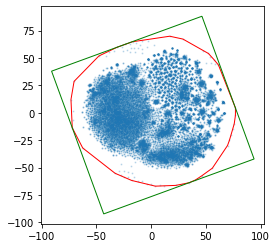

Epoch 1/90
6/6 [==============================] - 2s 185ms/step - loss: 1.5765 - accuracy: 0.3996 - val_loss: 1.2821 - val_accuracy: 0.6364
Epoch 2/90
6/6 [==============================] - 1s 151ms/step - loss: 1.1974 - accuracy: 0.6327 - val_loss: 0.8775 - val_accuracy: 0.5455
Epoch 3/90
6/6 [==============================] - 1s 150ms/step - loss: 0.7668 - accuracy: 0.7143 - val_loss: 0.6524 - val_accuracy: 0.6364
Epoch 4/90
6/6 [==============================] - 1s 151ms/step - loss: 0.3974 - accuracy: 0.8574 - val_loss: 0.5503 - val_accuracy: 0.8182
Epoch 5/90
6/6 [==============================] - 1s 154ms/step - loss: 0.2335 - accuracy: 0.9137 - val_loss: 0.5569 - val_accuracy: 0.8636
Epoch 6/90
6/6 [==============================] - 1s 153ms/step - loss: 0.1232 - accuracy: 0.9682 - val_loss: 0.9872 - val_accuracy: 0.7273
Epoch 7/90
6/6 [==============================] - 1s 153ms/step - loss: 0.1530 - accuracy: 0.9397 - val_loss: 0.9403 - val_accuracy: 0.8182
Epoch 8/90
6/6 [====

In [ ]:

acc_lst = []
los_lst = []
df_full = pd.read_csv('/content/drive/MyDrive/USYD/2021 S1/INFO4001/deng-reads-RawCount-modefied.csv',header=None)
for i in range(5):
    df = df_full 
    acc, los = model_repeat(df)

    acc_lst.append(acc)
    los_lst.append(los)

print(acc_lst)
print(los_lst)

In [ ]:
avg_cal = sum(acc_lst)/len(acc_lst)
print("The average is ", round(avg_cal,4))

The average is  0.937
